In [1]:
print("EDA notebook working")


EDA notebook working


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [3]:
import pandas as pd

df = pd.read_csv("retail_sales_cleaned.csv")
df.head()


,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180.0,05-11-2022,10:47:00,117.0,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522.0,09-07-2022,11:00:00,52.0,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559.0,12-12-2022,10:48:00,5.0,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180.0,06-01-2022,08:53:00,85.0,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522.0,14-11-2022,08:35:00,48.0,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [4]:
df.shape


(1987, 11)

In [5]:
df.dropna().shape


(699, 11)

Descriptive Statistics:
- Average customer age is around the middle-aged group.
- Quantity purchased per transaction is generally low.
- Total sales show high variation, indicating different spending levels.


In [6]:
df.describe()


,transactions_id,customer_id,age,quantiy,price_per_unit,cogs,total_sale
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,975.745351,51.808298,40.782546,2.510730,170.007153,67.417167,430.615165
std,581.997364,50.063002,13.572207,1.143481,188.693195,78.101822,548.732501
min,2.000000,1.000000,18.000000,1.000000,25.000000,6.250000,25.000000
25%,449.000000,4.000000,29.000000,1.000000,30.000000,11.500000,60.000000
50%,1000.000000,38.000000,41.000000,3.000000,50.000000,17.500000,120.000000
75%,1459.500000,93.000000,53.000000,4.000000,300.000000,129.000000,600.000000
max,2000.000000,155.000000,64.000000,4.000000,500.000000,275.000000,2000.000000


Correlation Analysis:
- Total sales show strong correlation with price per unit.
- Quantity has moderate impact on total sales.
- Age has very weak correlation with spending.


In [7]:
df.select_dtypes(include='number').corr()


,transactions_id,customer_id,age,quantiy,price_per_unit,cogs,total_sale
transactions_id,1.000000,-0.014359,0.016192,0.018262,-0.045775,-0.045928,-0.017889
customer_id,-0.014359,1.000000,-0.034785,0.116234,0.059079,0.054621,0.080888
age,0.016192,-0.034785,1.000000,-0.070192,-0.063035,-0.057389,-0.125586
quantiy,0.018262,0.116234,-0.070192,1.000000,0.017512,0.028026,0.350801
price_per_unit,-0.045775,0.059079,-0.063035,0.017512,1.000000,0.957683,0.861721
cogs,-0.045928,0.054621,-0.057389,0.028026,0.957683,1.000000,0.835586
total_sale,-0.017889,0.080888,-0.125586,0.350801,0.861721,0.835586,1.000000


Distribution Analysis (Age):
- Most customers fall between young and middle-aged groups.
- Very few customers are at extreme age ranges.


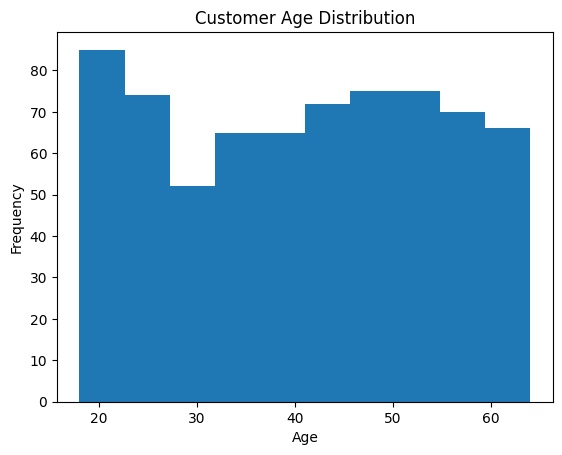

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=10)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


Outlier Analysis using Box Plot:
- Each category shows a wide range of total sales values.
- High-value outliers are present in all categories.
- These outliers likely represent bulk or premium purchases.


<Figure size 800x500 with 0 Axes>

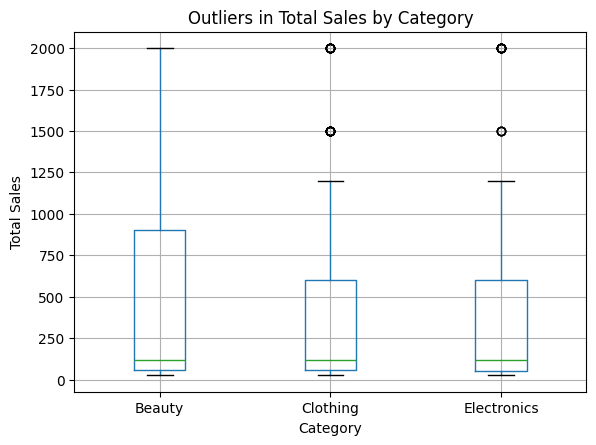

In [15]:
plt.figure(figsize=(8, 5))
df.boxplot(column='total_sale', by='category')
plt.title("Outliers in Total Sales by Category")
plt.suptitle("")  # removes automatic subtitle
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


Line Chart – Sales Trend Over Time
Sales Trend:
- Sales fluctuate significantly over time.
- This suggests seasonal demand or promotional effects.


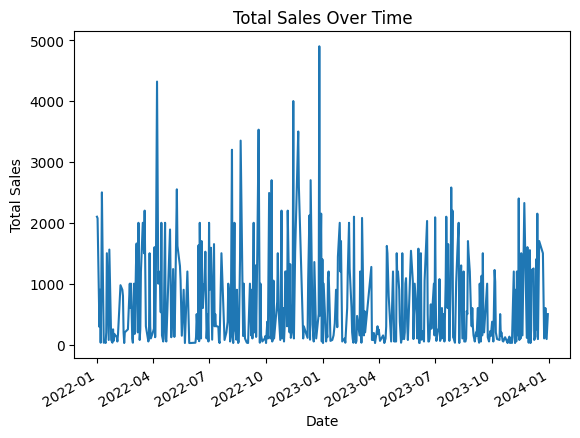

In [10]:
df['sale_date'] = pd.to_datetime(df['sale_date'], dayfirst=True)

df.groupby('sale_date')['total_sale'].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


Bar Chart – Sales by Category
Category Comparison:
- Clothing category contributes the highest revenue.
- Electronics and Beauty show comparatively lower sales.


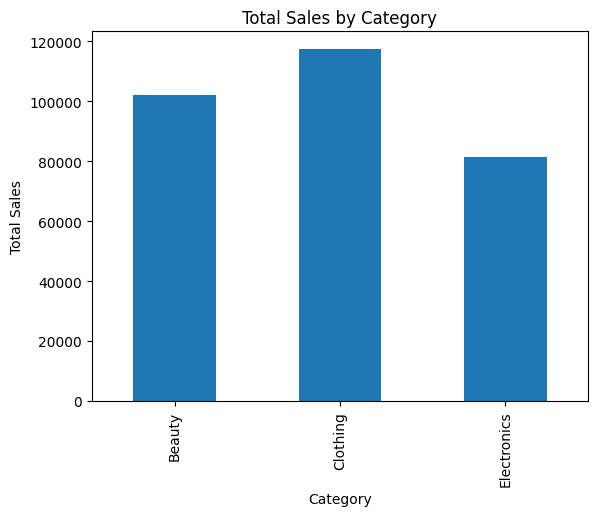

In [11]:
df.groupby('category')['total_sale'].sum().plot(kind='bar')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


Transaction Frequency Analysis:
- Clothing category has the highest number of transactions.
- Beauty and Electronics have fewer transactions.
- This indicates customer preference differs by product category.



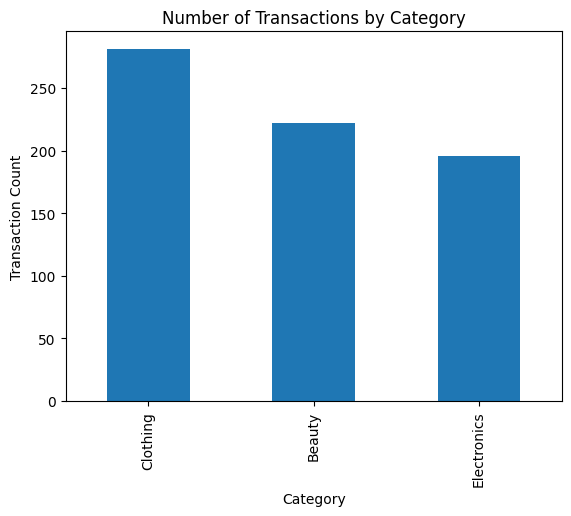

In [14]:
category_count = df['category'].value_counts()

category_count.plot(kind='bar')
plt.title("Number of Transactions by Category")
plt.xlabel("Category")
plt.ylabel("Transaction Count")
plt.show()

